# Is There a Weekend Effect?

Do usage pattern differ between weekends and weekdays?

In [1]:
%matplotlib inline

from urllib.request import urlretrieve
import os

import pandas as pd

In [2]:
def get_data(station='ECO09113499'):
    fname = "bikes-2017-2.csv"
    if not os.path.exists(fname):
        urlretrieve(
            "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/d17a0a74-1073-46f0-a26e-46a403c061ec/download/2017verkehrszaehlungenwertefussgaengervelo.csv",
            fname
        )
    data = pd.read_csv(fname, parse_dates=True, index_col='datum')
    
    data = data[data.fk_zaehler==station]
    data = data.drop(['fk_zaehler', "objectid", 'fuss_out', 'fuss_in'], axis=1)
    data['Total'] = data.velo_in + data.velo_out
    data.columns = ['North', 'South', 'Total']
    return data

## Riders over the course of a Year

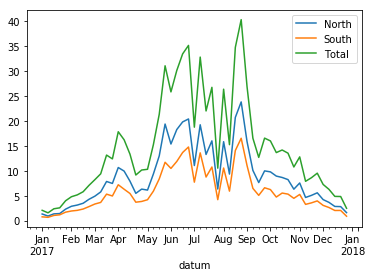

In [3]:
mythenquai = get_data()
mythenquai.resample('W').mean().plot()

In [4]:
def average_day(data, weekday=True):
    hourly = data.resample("H").sum()
    idx = hourly.index.dayofweek.isin((0,1,2,3,4))
    if not weekday:
        idx = ~idx

    hourly_week = hourly[idx]
    hourly_week.groupby(hourly_week.index.time).mean().plot()
    

## Weekends vs Weekdays

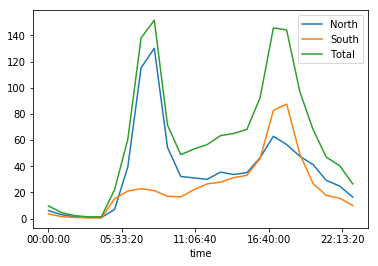

In [5]:
average_day(mythenquai)

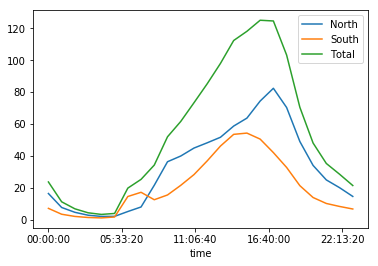

In [6]:
average_day(mythenquai, weekday=False)